**Ananthachandran_Vinutha_Final_Project**



1.   Name  : Vinutha Ananthachandran
2.   Github: Vinutha-Ananthachandran
3.   USC ID: 9195882821



In [1]:
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
os.chdir("drive/MyDrive/Colab Notebooks/ML Project/Data/Sport Images")

In [3]:
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/ML Project/Data/Sport Images'

In [4]:
labels = ['baseball','basketball','fencing','tennis','volleyball']
curr_dir = os.getcwd() + '/'
fdir = {}
for folder,subfolders,files in os.walk(curr_dir):
    for sub in subfolders:
      if sub in labels:
        fpath = curr_dir + sub
        files = os.listdir(fpath)
        fdir[fpath] = files

**copying the images into their corresponding train, validation and test folders -- ONE TIME EXECUTION ONLY**

In [5]:
from random import shuffle
fsnap = []
tr_files = []
val_files = []
tst_files = []
for folder,files in fdir.items():
  shuffle(files)
  tlim = int(len(files)*0.7)
 # vlim = int(len(files)*0.15)
  vlim = int((len(files) - tlim)/2)
  train_files = list(map(lambda x: folder+'/'+x,files[:tlim]))
  validation_files = list(map(lambda x: folder+'/'+x,files[tlim:tlim+vlim]))
  test_files = list(map(lambda x: folder+'/'+x,files[tlim+vlim:]))
  fsnap.append([folder,len(files),len(train_files),len(validation_files),len(test_files)])
  tr_files.extend(train_files)
  val_files.extend(validation_files)
  tst_files.extend(test_files)

In [6]:
fsnap_df = pd.DataFrame(fsnap,columns=['folder','total file count','training file count','validation file count','test file count'])

In [7]:
fsnap_df

,folder,total file count,training file count,validation file count,test file count
0,/content/drive/MyDrive/Colab Notebooks/ML Proj...,735,514,110,111
1,/content/drive/MyDrive/Colab Notebooks/ML Proj...,492,344,74,74
2,/content/drive/MyDrive/Colab Notebooks/ML Proj...,715,500,107,108
3,/content/drive/MyDrive/Colab Notebooks/ML Proj...,634,443,95,96
4,/content/drive/MyDrive/Colab Notebooks/ML Proj...,704,492,106,106


In [ ]:
tr_folder = '/content/drive/MyDrive/Colab_Notebooks/ML Project/Data/training data/'
for f in tr_files:
  fin_folder = ''
  if labels[0] in f:
    fin_folder = tr_folder+labels[0]+'/'
  elif labels[1] in f:
    fin_folder = tr_folder+labels[1]+'/'
  elif labels[2] in f:
    fin_folder = tr_folder+labels[2]+'/'
  elif labels[3] in f:
    fin_folder = tr_folder+labels[3]+'/'
  elif labels[4] in f:
    fin_folder = tr_folder+labels[4]+'/'
  if fin_folder != '':
    shutil.copy(f,fin_folder)

In [ ]:
tst_folder = '/content/drive/MyDrive/Colab Notebooks/ML Project/Data/test data/'
for f in tst_files:
  fin_folder = ''
  if labels[0] in f:
    fin_folder = tst_folder+labels[0]+'/'
  elif labels[1] in f:
    fin_folder = tst_folder+labels[1]+'/'
  elif labels[2] in f:
    fin_folder = tst_folder+labels[2]+'/'
  elif labels[3] in f:
    fin_folder = tst_folder+labels[3]+'/'
  elif labels[4] in f:
    fin_folder = tst_folder+labels[4]+'/'
  if fin_folder != '':
    shutil.copy(f,fin_folder)

In [ ]:
val_folder = '/content/drive/MyDrive/Colab Notebooks/ML Project/Data/validation data/'
for f in val_files:
  fin_folder = ''
  if labels[0] in f:
    fin_folder = val_folder+labels[0]+'/'
  elif labels[1] in f:
    fin_folder = val_folder+labels[1]+'/'
  elif labels[2] in f:
    fin_folder = val_folder+labels[2]+'/'
  elif labels[3] in f:
    fin_folder = val_folder+labels[3]+'/'
  elif labels[4] in f:
    fin_folder = val_folder+labels[4]+'/'
  if fin_folder != '':
    shutil.copy(f,fin_folder)

**making the images same size**

In [8]:
train_data = keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/Colab Notebooks/ML Project/Data/training data/',
    labels='inferred',
    label_mode='categorical',
    batch_size=5,
    image_size=(224, 224))
val_data = keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/Colab Notebooks/ML Project/Data/validation data/',
    labels='inferred',
    label_mode='categorical',
    batch_size=5,
    image_size=(224, 224))
test_data = keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/Colab Notebooks/ML Project/Data/test data/',
    labels='inferred',
    label_mode='categorical',
    batch_size=5,
    image_size=(224, 224))

Found 2293 files belonging to 5 classes.
Found 489 files belonging to 5 classes.
Found 497 files belonging to 5 classes.


In [9]:
label_map = {}
for key,lab in enumerate(test_data.class_names):
  label_map[lab] = key

In [10]:
label_map

{'baseball': 0, 'basketball': 1, 'fencing': 2, 'tennis': 3, 'volleyball': 4}

In [11]:
training_x = []
training_labels=[]
for images, labels in train_data:
    training_x.append(images)
    training_labels.append(labels)

test_x = []
test_labels=[]
for images, labels in test_data:
    test_x.append(images)
    test_labels.append(labels)

In [12]:
test_x = tf.concat(test_x,axis=0)
test_labels = tf.concat(test_labels,axis=0)

In [13]:
training_x = tf.concat(training_x,axis=0)
training_labels = tf.concat(training_labels,axis=0)

In [ ]:
iterator = test_data.unbatch().as_numpy_iterator()
# Iterate over the elements in the unbatched dataset
tst_true = []
for element in iterator:
    # Convert the element to a numpy array
    tst_true.append(element[1])

In [ ]:
iterator = train_data.unbatch().as_numpy_iterator()
# Iterate over the elements in the unbatched dataset
train_true = []
for element in iterator:
    # Convert the element to a numpy array
    train_true.append(element[1])

In [ ]:
tst_true = np.array(tst_true)

In [ ]:
train_true = np.array(train_true)

In [14]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import activations
from keras.layers import Dense, Dropout, Flatten
from keras.layers.pooling.global_max_pooling2d import GlobalMaxPooling2D
tf.get_logger().setLevel('ERROR')
import sklearn
from sklearn import metrics
from tensorflow import metrics
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Model
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

**ResNet50**

In [15]:
from tensorflow.keras.applications import resnet50

In [16]:
image_size = 224
inp = layers.Input(shape=(image_size, image_size, 3)) #number of color channels (RGB)
img_aug = Sequential(
        [
            layers.RandomZoom(0.25),
            layers.RandomCrop(height= 200, width= 200),
            layers.RandomRotation(factor=0.2),
            layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
            layers.RandomFlip(),
            layers.RandomContrast(factor=0.05),
        ],
        name="img_aug",
    )
itensor = img_aug(inp)
rmodel = resnet50.ResNet50(include_top=False, input_tensor=itensor, weights= 'imagenet')
rmodel.trainable = False

94765736/94765736 [==============================] - 3s 0us/step


In [17]:
resnet = Sequential()
resnet.add(rmodel)
resnet.add(keras.layers.BatchNormalization())
resnet.add(keras.layers.Activation(activations.relu))
resnet.add(GlobalMaxPooling2D())
resnet.add(Dropout(0.2))
resnet.add(Dense(5, activation= 'softmax'))
resnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 batch_normalization (BatchN  (None, 7, 7, 2048)       8192      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 7, 7, 2048)        0         
                                                                 
 global_max_pooling2d (Globa  (None, 2048)             0         
 lMaxPooling2D)                                                  
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 5)                 1

In [18]:
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
resnet.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['accuracy']) 
result_resnet = resnet.fit(train_data, epochs=100,validation_data=val_data, callbacks= tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=2, restore_best_weights=True))

Epoch 1/100
459/459 [==============================] - 37s 49ms/step - loss: 4.8657 - accuracy: 0.4261 - val_loss: 2.0018 - val_accuracy: 0.6830
Epoch 2/100
459/459 [==============================] - 7s 14ms/step - loss: 3.8688 - accuracy: 0.5329 - val_loss: 1.5338 - val_accuracy: 0.7403
Epoch 3/100
459/459 [==============================] - 7s 15ms/step - loss: 3.4857 - accuracy: 0.5809 - val_loss: 1.7447 - val_accuracy: 0.7423
Epoch 4/100
459/459 [==============================] - 7s 14ms/step - loss: 3.0788 - accuracy: 0.6175 - val_loss: 2.1978 - val_accuracy: 0.7260
Epoch 5/100
459/459 [==============================] - 7s 15ms/step - loss: 3.4096 - accuracy: 0.6044 - val_loss: 1.9134 - val_accuracy: 0.7485
Epoch 6/100
459/459 [==============================] - 7s 14ms/step - loss: 3.2821 - accuracy: 0.6001 - val_loss: 1.4554 - val_accuracy: 0.7873
Epoch 7/100
459/459 [==============================] - 7s 15ms/step - loss: 3.3852 - accuracy: 0.6066 - val_loss: 1.6102 - val_accuracy

In [19]:
training_accuracy = result_resnet.history["accuracy"]
training_loss = []
for accuracy in training_accuracy:
  training_loss.append(1-accuracy)
validation_accuracy = result_resnet.history["val_accuracy"]
validation_loss = []
for accuracy in validation_accuracy:
  validation_loss.append(1-accuracy)

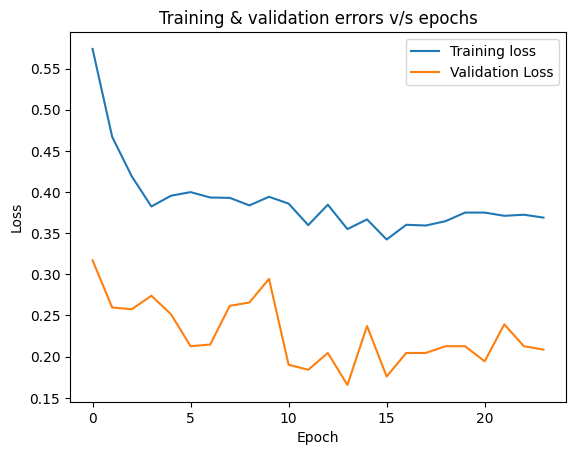

In [20]:
plt.plot(training_loss, label='Training error')
plt.plot(validation_loss, label = 'Validation error')
plt.title("Training & validation errors v/s epochs")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Training loss", "Validation Loss"], loc="upper right")
plt.show()

**TEST MODEL METRICS**

In [21]:
y_pred = resnet.predict(test_x)
y_predict = np.argmax(y_pred,axis=1)
y_true = np.argmax(test_labels,axis=1)
racc = accuracy_score(y_true,y_predict)

16/16 [==============================] - 2s 32ms/step


In [22]:
# Convert the binary indicator matrices to binary classification problems
print('Confusion Matrix:')
print('----------------')
print(confusion_matrix(y_true,y_predict))
#for i in range(y_true.shape[1]):
#    class_true = y_true[:, i]
#   class_pred = y_predict[:, i]
#    tn, fp, fn, tp = confusion_matrix(class_true, class_pred).ravel()
#    print(f"Confusion matrix for class {i}:")
#    print(f"True negatives: {tn}, False positives: {fp}, False negatives: {fn}, True positives: {tp}")

Confusion Matrix:
----------------
[[92 13  4  0  2]
 [ 0 68  2  3  2]
 [ 2  4 87  1  2]
 [ 8  4  6 86  4]
 [ 3  6 11  0 87]]


In [23]:
print('Classification Report:')
print('----------------------')
print(classification_report(y_true,y_predict))

Classification Report:
----------------------
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       111
           1       0.72      0.91      0.80        75
           2       0.79      0.91      0.84        96
           3       0.96      0.80      0.87       108
           4       0.90      0.81      0.85       107

    accuracy                           0.85       497
   macro avg       0.85      0.85      0.84       497
weighted avg       0.86      0.85      0.85       497



In [24]:
print('accuracy score:')
print('---------------')
print(racc)

accuracy score:
---------------
0.8450704225352113


**TRAINING MODEL METRICS**

In [25]:
y_pred_train = resnet.predict(training_x)
y_predict_train = np.argmax(y_pred_train,axis=1)
y_true_train = np.argmax(training_labels,axis=1)
racc_train = accuracy_score(y_true_train,y_predict_train)

72/72 [==============================] - 1s 20ms/step


In [26]:
# Convert the binary indicator matrices to binary classification problems
print('Confusion Matrix:')
print('----------------')
print(confusion_matrix(y_true_train,y_predict_train))
#for i in range(y_true_train.shape[1]):
#    class_true = y_true_train[:, i]
#    class_pred = y_predict_train[:, i]
#    tn, fp, fn, tp = confusion_matrix(class_true, class_pred).ravel()
#    print(f"Confusion matrix for class {i}:")
#    print(f"True negatives: {tn}, False positives: {fp}, False negatives: {fn}, True positives: {tp}")

Confusion Matrix:
----------------
[[460  20  22   5   7]
 [  2 312   8   3  19]
 [  7   7 413   7   9]
 [ 34  24  24 401  17]
 [ 19  35  40   4 394]]


In [27]:
print('Classification Report:')
print('----------------------')
print(classification_report(y_true_train,y_predict_train,target_names=['0','1','2','3','4']))

Classification Report:
----------------------
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       514
           1       0.78      0.91      0.84       344
           2       0.81      0.93      0.87       443
           3       0.95      0.80      0.87       500
           4       0.88      0.80      0.84       492

    accuracy                           0.86      2293
   macro avg       0.86      0.87      0.86      2293
weighted avg       0.87      0.86      0.86      2293



In [28]:
print('accuracy_score:')
print('---------------')
print(racc_train)

accuracy_score:
---------------
0.8634976013955517


**EfficientNetB0**

In [29]:
from tensorflow.keras.applications import EfficientNetB0

In [30]:
einp = layers.Input(shape=(224, 224, 3)) #number of color channels (RGB)
eimg_aug = Sequential(
        [
            layers.RandomZoom(0.25),
            layers.RandomCrop(height= 200, width= 200),
            layers.RandomRotation(factor=0.2),
            layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
            layers.RandomFlip(),
            layers.RandomContrast(factor=0.05),
        ],
        name="eimg_aug",
    )
e_itensor = eimg_aug(einp)
emodel = EfficientNetB0(include_top=False, input_tensor=e_itensor, weights= 'imagenet')
emodel.trainable = False

16705208/16705208 [==============================] - 1s 0us/step


In [32]:
effnet = Sequential()
effnet.add(emodel)
effnet.add(keras.layers.BatchNormalization())
effnet.add(keras.layers.Activation(activations.relu))
effnet.add(GlobalMaxPooling2D())
effnet.add(Dropout(0.2))
effnet.add(Dense(5, activation= 'softmax'))
effnet.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 batch_normalization_2 (Batc  (None, 7, 7, 1280)       5120      
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   (None, 7, 7, 1280)        0         
                                                                 
 global_max_pooling2d_2 (Glo  (None, 1280)             0         
 balMaxPooling2D)                                                
                                                                 
 dropout_2 (Dropout)         (None, 1280)              0         
                                                                 
 dense_2 (Dense)             (None, 5)                

In [33]:
eff_adam = tf.keras.optimizers.Adam(learning_rate=0.001)
effnet.compile(optimizer= eff_adam, loss='categorical_crossentropy', metrics=['accuracy']) 
result_effnet = effnet.fit(train_data, epochs=100,validation_data=val_data, callbacks= tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=2, restore_best_weights=True))

Epoch 1/100
459/459 [==============================] - 17s 20ms/step - loss: 3.7793 - accuracy: 0.4331 - val_loss: 1.8662 - val_accuracy: 0.7055
Epoch 2/100
459/459 [==============================] - 7s 15ms/step - loss: 2.5513 - accuracy: 0.5918 - val_loss: 1.2747 - val_accuracy: 0.7996
Epoch 3/100
459/459 [==============================] - 7s 15ms/step - loss: 2.3195 - accuracy: 0.6249 - val_loss: 0.6308 - val_accuracy: 0.8671
Epoch 4/100
459/459 [==============================] - 7s 15ms/step - loss: 2.0786 - accuracy: 0.6594 - val_loss: 0.8860 - val_accuracy: 0.8528
Epoch 5/100
459/459 [==============================] - 7s 15ms/step - loss: 2.1166 - accuracy: 0.6511 - val_loss: 0.9352 - val_accuracy: 0.8384
Epoch 6/100
459/459 [==============================] - 7s 15ms/step - loss: 2.1006 - accuracy: 0.6590 - val_loss: 0.9931 - val_accuracy: 0.8262
Epoch 7/100
459/459 [==============================] - 7s 15ms/step - loss: 2.1653 - accuracy: 0.6420 - val_loss: 0.9309 - val_accuracy

In [34]:
eff_training_accuracy = result_effnet.history["accuracy"]
eff_training_loss = []
for accuracy in eff_training_accuracy:
  eff_training_loss.append(1-accuracy)
eff_validation_accuracy = result_effnet.history["val_accuracy"]
eff_validation_loss = []
for accuracy in eff_validation_accuracy:
  eff_validation_loss.append(1-accuracy)

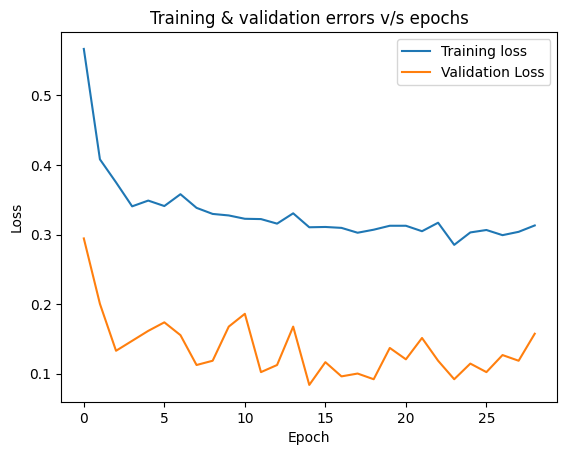

In [35]:
plt.plot(eff_training_loss, label='Training error')
plt.plot(eff_validation_loss, label = 'Validation error')
plt.title("Training & validation errors v/s epochs")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Training loss", "Validation Loss"], loc="upper right")
plt.show()

**TEST MODEL METRICS**

In [36]:
eff_y_pred = effnet.predict(test_x)
eff_y_predict = np.argmax(eff_y_pred,axis=1)
eff_y_true = np.argmax(test_labels,axis=1)
eff_racc = accuracy_score(eff_y_true,eff_y_predict)

16/16 [==============================] - 2s 18ms/step


In [37]:
# Convert the binary indicator matrices to binary classification problems
print('Confusion Matrix:')
print('----------------')
print(confusion_matrix(eff_y_true,eff_y_predict))
#for i in range(eff_y_true.shape[1]):
#    class_true = eff_y_true[:, i]
#    class_pred = eff_y_predict[:, i]
#    tn, fp, fn, tp = confusion_matrix(class_true, class_pred).ravel()
#    print(f"Confusion matrix for class {i}:")
#    print(f"True negatives: {tn}, False positives: {fp}, False negatives: {fn}, True positives: {tp}")

Confusion Matrix:
----------------
[[104   0   6   0   1]
 [  0  74   1   0   0]
 [  8   3  80   5   0]
 [ 10   1   3  91   3]
 [  2   9   2   1  93]]


In [38]:
print('Classification Report:')
print('----------------------')
print(classification_report(eff_y_true,eff_y_predict,target_names=['0','1','2','3','4']))

Classification Report:
----------------------
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       111
           1       0.85      0.99      0.91        75
           2       0.87      0.83      0.85        96
           3       0.94      0.84      0.89       108
           4       0.96      0.87      0.91       107

    accuracy                           0.89       497
   macro avg       0.89      0.89      0.89       497
weighted avg       0.89      0.89      0.89       497



In [39]:
print('accuracy score:')
print('---------------')
print(eff_racc)

accuracy score:
---------------
0.8893360160965795


**TRAINING MODEL METRICS**

In [40]:
eff_y_pred_train = effnet.predict(training_x)
eff_y_predict_train = np.argmax(eff_y_pred_train,axis=1)
eff_y_true_train = np.argmax(training_labels,axis=1)
eff_racc_train = accuracy_score(eff_y_true_train,eff_y_predict_train)

72/72 [==============================] - 1s 16ms/step


In [41]:
# Convert the binary indicator matrices to binary classification problems
print('Confusion Matrix:')
print('----------------')
print(confusion_matrix(eff_y_true_train,eff_y_predict_train))
#for i in range(eff_y_true_train.shape[1]):
#    class_true = eff_y_true_train[:, i]
#    class_pred = eff_y_predict_train[:, i]
#    tn, fp, fn, tp = confusion_matrix(class_true, class_pred).ravel()
#    print(f"Confusion matrix for class {i}:")
#    print(f"True negatives: {tn}, False positives: {fp}, False negatives: {fn}, True positives: {tp}")

Confusion Matrix:
----------------
[[486  15   9   3   1]
 [  1 332   6   1   4]
 [ 13   8 410   6   6]
 [ 19  20   4 452   5]
 [  9  42   5   5 431]]


In [42]:
print('Classification Report:')
print('----------------------')
print(classification_report(eff_y_true_train,eff_y_predict_train,target_names=['0','1','2','3','4']))

Classification Report:
----------------------
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       514
           1       0.80      0.97      0.87       344
           2       0.94      0.93      0.94       443
           3       0.97      0.90      0.93       500
           4       0.96      0.88      0.92       492

    accuracy                           0.92      2293
   macro avg       0.92      0.92      0.92      2293
weighted avg       0.93      0.92      0.92      2293



In [43]:
print('accuracy score:')
print('---------------')
print(eff_racc_train)

accuracy score:
---------------
0.9206279982555604


**VGG16**

In [44]:
vinp = layers.Input(shape=(224, 224, 3)) #number of color channels (RGB)
vimg_aug = Sequential(
        [
            layers.RandomZoom(0.25),
            layers.RandomCrop(height= 200, width= 200),
            layers.RandomRotation(factor=0.2),
            layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
            layers.RandomFlip(),
            layers.RandomContrast(factor=0.05),
        ],
        name="vimg_aug",
    )
v_itensor = vimg_aug(vinp)
vmodel = VGG16(include_top=False, input_tensor=v_itensor, weights= 'imagenet')
vmodel.trainable = False

58889256/58889256 [==============================] - 2s 0us/step


In [45]:
v_itensor = vmodel.output
v_itensor = Flatten(name="flatten")(v_itensor)
v_itensor = layers.BatchNormalization()(v_itensor)
v_itensor = layers.Dense(500, activation="relu")(v_itensor)
v_itensor = layers.Dropout(0.2, name="top_dropout")(v_itensor)
vout_layer = layers.Dense(5, activation='softmax', name="pred")(v_itensor)
vgg_model = Model(vinp,vout_layer)

In [46]:
vgg_adam = tf.keras.optimizers.Adam(learning_rate=0.001)
vgg_model.compile(optimizer= vgg_adam, loss='categorical_crossentropy', metrics=['accuracy']) 
result_vgg = vgg_model.fit(train_data, epochs=100,validation_data=val_data, callbacks= tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=2, restore_best_weights=True))

Epoch 1/100
459/459 [==============================] - 9s 14ms/step - loss: 2.5848 - accuracy: 0.5390 - val_loss: 2.7716 - val_accuracy: 0.6933
Epoch 2/100
459/459 [==============================] - 5s 11ms/step - loss: 0.9847 - accuracy: 0.6520 - val_loss: 2.0471 - val_accuracy: 0.7157
Epoch 3/100
459/459 [==============================] - 5s 11ms/step - loss: 0.9198 - accuracy: 0.6638 - val_loss: 2.0412 - val_accuracy: 0.7444
Epoch 4/100
459/459 [==============================] - 5s 11ms/step - loss: 0.8620 - accuracy: 0.6790 - val_loss: 1.8543 - val_accuracy: 0.7546
Epoch 5/100
459/459 [==============================] - 5s 11ms/step - loss: 0.8942 - accuracy: 0.6821 - val_loss: 2.1984 - val_accuracy: 0.7628
Epoch 6/100
459/459 [==============================] - 5s 11ms/step - loss: 0.8465 - accuracy: 0.7013 - val_loss: 2.2467 - val_accuracy: 0.7669
Epoch 7/100
459/459 [==============================] - 5s 11ms/step - loss: 0.8854 - accuracy: 0.6829 - val_loss: 2.2448 - val_accuracy:

In [47]:
vgg_training_accuracy = result_vgg.history["accuracy"]
vgg_training_loss = []
for accuracy in vgg_training_accuracy:
  vgg_training_loss.append(1-accuracy)
vgg_validation_accuracy = result_vgg.history["val_accuracy"]
vgg_validation_loss = []
for accuracy in vgg_validation_accuracy:
  vgg_validation_loss.append(1-accuracy)

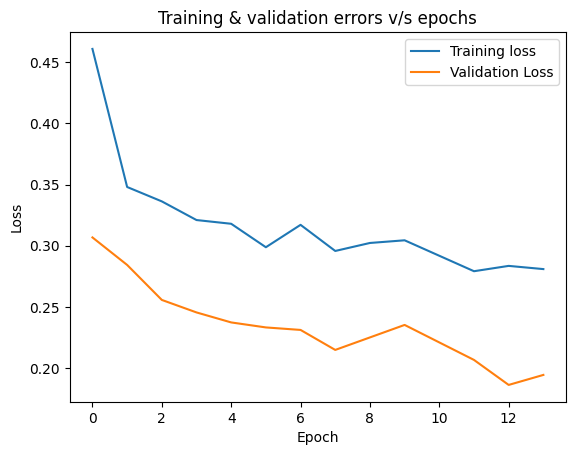

In [48]:
plt.plot(vgg_training_loss, label='Training error')
plt.plot(vgg_validation_loss, label = 'Validation error')
plt.title("Training & validation errors v/s epochs")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Training loss", "Validation Loss"], loc="upper right")
plt.show()

**TEST**

In [49]:
vgg_y_pred = vgg_model.predict(test_x)
vgg_y_predict = np.argmax(vgg_y_pred,axis=1)
vgg_y_true = np.argmax(test_labels,axis=1)
vgg_racc = accuracy_score(vgg_y_true,vgg_y_predict)

16/16 [==============================] - 2s 50ms/step


In [50]:
# Convert the binary indicator matrices to binary classification problems
print('Confusion Matrix:')
print('----------------')
print(confusion_matrix(vgg_y_true,vgg_y_predict))
#for i in range(vgg_y_true.shape[1]):
#    class_true = vgg_y_true[:, i]
#    class_pred = vgg_y_predict[:, i]
#    tn, fp, fn, tp = confusion_matrix(class_true, class_pred).ravel()
#    print(f"Confusion matrix for class {i}:")
#    print(f"True negatives: {tn}, False positives: {fp}, False negatives: {fn}, True positives: {tp}")

Confusion Matrix:
----------------
[[88  8  5  7  3]
 [ 4 60  3  2  6]
 [ 5  2 73  9  7]
 [11  3  6 82  6]
 [ 8  5 11  2 81]]


In [51]:
print('Classification Report:')
print('----------------------')
print(classification_report(vgg_y_true,vgg_y_predict,target_names=['0','1','2','3','4']))

Classification Report:
----------------------
              precision    recall  f1-score   support

           0       0.76      0.79      0.78       111
           1       0.77      0.80      0.78        75
           2       0.74      0.76      0.75        96
           3       0.80      0.76      0.78       108
           4       0.79      0.76      0.77       107

    accuracy                           0.77       497
   macro avg       0.77      0.77      0.77       497
weighted avg       0.77      0.77      0.77       497



In [52]:
print('accuracy score:')
print('---------------')
print(vgg_racc)

accuracy score:
---------------
0.772635814889336


**TRAINING MODEL METRICS**

In [53]:
vgg_y_pred_train = vgg_model.predict(training_x)
vgg_y_predict_train = np.argmax(vgg_y_pred_train,axis=1)
vgg_y_true_train = np.argmax(training_labels,axis=1)
vgg_racc_train = accuracy_score(vgg_y_true_train,vgg_y_predict_train)

72/72 [==============================] - 2s 27ms/step


In [54]:
# Convert the binary indicator matrices to binary classification problems
print('Confusion Matrix:')
print('----------------')
print(confusion_matrix(vgg_y_true_train,vgg_y_predict_train))
#for i in range(vgg_y_true_train.shape[1]):
#    class_true = vgg_y_true_train[:, i]
#    class_pred = vgg_y_predict_train[:, i]
#    tn, fp, fn, tp = confusion_matrix(class_true, class_pred).ravel()
#    print(f"Confusion matrix for class {i}:")
#    print(f"True negatives: {tn}, False positives: {fp}, False negatives: {fn}, True positives: {tp}")

Confusion Matrix:
----------------
[[448  13  23  23   7]
 [ 13 293  10   8  20]
 [ 37  10 360  20  16]
 [ 55  10  17 408  10]
 [ 25  30  25  17 395]]


In [55]:
print('Classification Report:')
print('----------------------')
print(classification_report(vgg_y_true_train,vgg_y_predict_train,target_names=['0','1','2','3','4']))

Classification Report:
----------------------
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       514
           1       0.82      0.85      0.84       344
           2       0.83      0.81      0.82       443
           3       0.86      0.82      0.84       500
           4       0.88      0.80      0.84       492

    accuracy                           0.83      2293
   macro avg       0.83      0.83      0.83      2293
weighted avg       0.83      0.83      0.83      2293



In [56]:
print('accuracy score:')
print('---------------')
print(vgg_racc_train)

accuracy score:
---------------
0.8303532490187527


**Video Classification Using Moving Averages**

In [57]:
import cv2

In [58]:
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/ML Project/Data/Sport Images'

In [59]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/ML Project/Data/Sport Videos')

In [60]:
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/ML Project/Data/Sport Videos'

In [61]:
vid_library = {}
current = os.getcwd() + '/'
vid_labels = ['BaseballPitch','Basketball','Fencing','TennisSwing','VolleyballSpiking']
folder_map = {'BaseballPitch':'baseball','Basketball':'basketball','Fencing':'fencing','TennisSwing':'tennis','VolleyballSpiking':'volleyball'}
for folder,subfolder,f in os.walk(current):
    if len(subfolder) > 0:
      for sub in subfolder:
        fpath = current + sub
        files = os.listdir(fpath)
        vid_library[sub] = list(map(lambda x: fpath+'/'+x,files))

In [62]:
vid_frame = {}
L = 100
frame_map = {}
failure = {}
for key,value in vid_library.items():
  for vid in value:
    frames = []
    vcap = cv2.VideoCapture(vid)
    tot_frame = int(vcap.get(cv2.CAP_PROP_FRAME_COUNT))
    if tot_frame<=L:
      L=tot_frame
    count = 0
    while vcap.isOpened():
        success, frame = vcap.read()
        if not success:
          if failure.get(key) == None:
            failure[key] = [vid]
          else:
            failure.get(key).append(vid)
          break
        processed_frame = cv2.resize(frame,(224,224))
        processed_frame = np.expand_dims(processed_frame, axis=0)
        if frame_map.get(key) == None:
          frame_map[key] = [processed_frame]
        else:
          frame_map.get(key).append(processed_frame)
        if vid_frame.get(vid) == None:
          vid_frame[vid] = [processed_frame]
        else:
          vid_frame.get(vid).append(processed_frame)
        count += 1
        if count == L:
          break
    vcap.release()

In [64]:
len(vid_frame.keys())

681

In [65]:
import imageio
from skimage.transform import resize
L = 100
flag = True
if len(failure) != 0:
  for key,value in failure.items():
    for vid in value:
      video = imageio.get_reader(vid)
      fps = video.get_meta_data()['fps']
      duration = video.get_meta_data()['duration']
      num_frames = int(duration * fps)
      if video == None:
        break
      if num_frames <= L:
        for i in range(0,num_frames):
          frame = video.get_data(i)
          resized_frame = resize(frame, (224, 224))
          frame_uint8 = (resized_frame * 255).astype(np.uint8)
          frame_uint8 = np.expand_dims(frame_uint8,axis=0)
          if frame_map.get(key) == None:
            frame_map[key] = [frame_uint8]
          else:
            frame_map.get(key).append(frame_uint8)
          if vid_frame.get(vid) == None:
            vid_frame[vid] = [frame_uint8]
          else:
            vid_frame.get(vid).append(frame_uint8)
      else:
        section = int(num_frames/L)
        count = 0
        for i in range(0,num_frames):
          if i % section == 1:
            frame = video.get_data(i)
            resized_frame = resize(frame,(224,224))
            frame_uint8 = (resized_frame * 255).astype(np.uint8)
            frame_uint8 = np.expand_dims(frame_uint8,axis=0)
            if frame_map.get(key) == None:
              frame_map[key] == [frame_uint8]
            else:
              frame_map.get(key).append(frame_uint8)
            if vid_frame.get(vid) == None:
              vid_frame[vid] = [frame_uint8]
            else:
              vid_frame.get(vid).append(frame_uint8)
      video.close()

In [66]:
new_train_data = val_data.concatenate(test_data)

In [67]:
early_stop = EarlyStopping(monitor='loss',patience=10,mode='min', verbose=1, restore_best_weights=True)

**ResNet50**

In [68]:
keras.models.save_model(resnet, 'resnet50.hdf5')

In [69]:
video_resnet = keras.models.load_model('resnet50.hdf5')
vid_rn = video_resnet.fit(new_train_data, epochs=100,callbacks=[early_stop])

Epoch 1/100
198/198 [==============================] - 6s 16ms/step - loss: 3.9735 - accuracy: 0.5720
Epoch 2/100
198/198 [==============================] - 3s 13ms/step - loss: 3.6644 - accuracy: 0.6085
Epoch 3/100
198/198 [==============================] - 3s 13ms/step - loss: 3.1728 - accuracy: 0.6410
Epoch 4/100
198/198 [==============================] - 3s 13ms/step - loss: 3.4761 - accuracy: 0.6146
Epoch 5/100
198/198 [==============================] - 3s 13ms/step - loss: 3.3841 - accuracy: 0.5832
Epoch 6/100
198/198 [==============================] - 3s 13ms/step - loss: 2.9715 - accuracy: 0.6136
Epoch 7/100
198/198 [==============================] - 3s 13ms/step - loss: 2.8208 - accuracy: 0.6349
Epoch 8/100
198/198 [==============================] - 3s 13ms/step - loss: 3.4873 - accuracy: 0.5963
Epoch 9/100
198/198 [==============================] - 3s 13ms/step - loss: 2.7686 - accuracy: 0.6217
Epoch 10/100
198/198 [==============================] - 3s 12ms/step - loss: 2.790

In [70]:
result = []
for video,frames in vid_frame.items():
  tempo = []
  class_0 = []
  class_1 = []
  class_2 = []
  class_3 = []
  class_4 = []
  for f in frames:
    y_pred = video_resnet.predict(f,verbose=0)
    class_0.append(y_pred[0][0])
    class_1.append(y_pred[0][1])
    class_2.append(y_pred[0][2])
    class_3.append(y_pred[0][3])
    class_4.append(y_pred[0][4])
  rolling_average1 = pd.Series(np.array(class_0)).rolling(window=2).mean()
  rolling_average2 = pd.Series(np.array(class_1)).rolling(window=2).mean()
  rolling_average3 = pd.Series(np.array(class_2)).rolling(window=2).mean()
  rolling_average4 = pd.Series(np.array(class_3)).rolling(window=2).mean()
  rolling_average5 = pd.Series(np.array(class_4)).rolling(window=2).mean()
  tempo.append(rolling_average1[np.argmax(rolling_average1,axis=0)])
  tempo.append(rolling_average2[np.argmax(rolling_average2,axis=0)])
  tempo.append(rolling_average3[np.argmax(rolling_average3,axis=0)])
  tempo.append(rolling_average4[np.argmax(rolling_average4,axis=0)])
  tempo.append(rolling_average5[np.argmax(rolling_average5,axis=0)])
  result.append([video,np.argmax(tempo,axis=0)])

In [71]:
result_df = pd.DataFrame(result,columns=['video','class'])

In [ ]:
result_df.to_csv('file1.csv')

In [72]:
result_df

,video,class
0,/content/drive/MyDrive/Colab Notebooks/ML Proj...,2
1,/content/drive/MyDrive/Colab Notebooks/ML Proj...,2
2,/content/drive/MyDrive/Colab Notebooks/ML Proj...,2
3,/content/drive/MyDrive/Colab Notebooks/ML Proj...,2
4,/content/drive/MyDrive/Colab Notebooks/ML Proj...,2
...,...,...
676,/content/drive/MyDrive/Colab Notebooks/ML Proj...,2
677,/content/drive/MyDrive/Colab Notebooks/ML Proj...,2
678,/content/drive/MyDrive/Colab Notebooks/ML Proj...,2
679,/content/drive/MyDrive/Colab Notebooks/ML Proj...,2


In [73]:
true_val = result
vid_resnet_y_true = []
for i in range(0,len(true_val)):
  act = true_val[i][0].split('/')[-2]
  vid_resnet_y_true.append(label_map.get(folder_map.get(act)))

In [74]:
vid_resnet_y_predict = list(result_df['class'])

In [75]:
print('Class to Label Mapping:')
print('-----------------------')
for key,value in label_map.items():
  print(f'class {value} - {key}')

Class to Label Mapping:
-----------------------
class 0 - baseball
class 1 - basketball
class 2 - fencing
class 3 - tennis
class 4 - volleyball


In [76]:
print('Confusion Matrix for Resnet50 - Video Classification')
print('----------------------------------------------------')
confusion_matrix(vid_resnet_y_true,vid_resnet_y_predict)

Confusion Matrix for Resnet50 - Video Classification
----------------------------------------------------


array([[137,   0,  13,   0,   0],
       [ 20,   0,  99,   0,  18],
       [  7,   0, 103,   0,   1],
       [ 60,   0,  85,   6,  16],
       [  3,   0,  97,   0,  16]])

In [77]:
print('Classification Report:')
print('----------------------')
print(classification_report(vid_resnet_y_true,vid_resnet_y_predict,target_names=['class 0','class 1','class 2','class 3','class 4']))

Classification Report:
----------------------
              precision    recall  f1-score   support

     class 0       0.60      0.91      0.73       150
     class 1       0.00      0.00      0.00       137
     class 2       0.26      0.93      0.41       111
     class 3       1.00      0.04      0.07       167
     class 4       0.31      0.14      0.19       116

    accuracy                           0.38       681
   macro avg       0.44      0.40      0.28       681
weighted avg       0.47      0.38      0.28       681



In [78]:
print('Accuracy Score:')
print('---------------')
print(accuracy_score(vid_resnet_y_true,vid_resnet_y_predict))

Accuracy Score:
---------------
0.38472834067547723


**EfficientNetB0**

In [79]:
vid_en = effnet.fit(new_train_data, epochs=100,callbacks=[early_stop])

Epoch 1/100
198/198 [==============================] - 3s 14ms/step - loss: 1.6672 - accuracy: 0.6866
Epoch 2/100
198/198 [==============================] - 3s 13ms/step - loss: 1.6849 - accuracy: 0.6795
Epoch 3/100
198/198 [==============================] - 3s 14ms/step - loss: 1.6844 - accuracy: 0.6633
Epoch 4/100
198/198 [==============================] - 3s 13ms/step - loss: 1.7510 - accuracy: 0.6785
Epoch 5/100
198/198 [==============================] - 3s 14ms/step - loss: 1.5570 - accuracy: 0.6998
Epoch 6/100
198/198 [==============================] - 3s 13ms/step - loss: 1.8773 - accuracy: 0.6602
Epoch 7/100
198/198 [==============================] - 3s 13ms/step - loss: 1.5478 - accuracy: 0.6937
Epoch 8/100
198/198 [==============================] - 3s 14ms/step - loss: 1.5810 - accuracy: 0.6866
Epoch 9/100
198/198 [==============================] - 3s 13ms/step - loss: 1.5530 - accuracy: 0.6897
Epoch 10/100
198/198 [==============================] - 3s 13ms/step - loss: 1.554

In [81]:
effnet_result = []
for video,frames in vid_frame.items():
  tempo = []
  class_0 = []
  class_1 = []
  class_2 = []
  class_3 = []
  class_4 = []
  for f in frames:
    y_pred = effnet.predict(f,verbose=0)
    class_0.append(y_pred[0][0])
    class_1.append(y_pred[0][1])
    class_2.append(y_pred[0][2])
    class_3.append(y_pred[0][3])
    class_4.append(y_pred[0][4])
  rolling_average1 = pd.Series(np.array(class_0)).rolling(window=2).mean()
  rolling_average2 = pd.Series(np.array(class_1)).rolling(window=2).mean()
  rolling_average3 = pd.Series(np.array(class_2)).rolling(window=2).mean()
  rolling_average4 = pd.Series(np.array(class_3)).rolling(window=2).mean()
  rolling_average5 = pd.Series(np.array(class_4)).rolling(window=2).mean()
  tempo.append(rolling_average1[np.argmax(rolling_average1,axis=0)])
  tempo.append(rolling_average2[np.argmax(rolling_average2,axis=0)])
  tempo.append(rolling_average3[np.argmax(rolling_average3,axis=0)])
  tempo.append(rolling_average4[np.argmax(rolling_average4,axis=0)])
  tempo.append(rolling_average5[np.argmax(rolling_average5,axis=0)])
  effnet_result.append([video,np.argmax(tempo,axis=0)])

In [82]:
effnet_result_df = pd.DataFrame(effnet_result,columns=['video','class'])

In [83]:
effnet_result_df

,video,class
0,/content/drive/MyDrive/Colab Notebooks/ML Proj...,3
1,/content/drive/MyDrive/Colab Notebooks/ML Proj...,2
2,/content/drive/MyDrive/Colab Notebooks/ML Proj...,4
3,/content/drive/MyDrive/Colab Notebooks/ML Proj...,2
4,/content/drive/MyDrive/Colab Notebooks/ML Proj...,2
...,...,...
676,/content/drive/MyDrive/Colab Notebooks/ML Proj...,4
677,/content/drive/MyDrive/Colab Notebooks/ML Proj...,2
678,/content/drive/MyDrive/Colab Notebooks/ML Proj...,2
679,/content/drive/MyDrive/Colab Notebooks/ML Proj...,4


In [84]:
true_val = effnet_result
vid_effnet_y_true = []
for i in range(0,len(true_val)):
  act = true_val[i][0].split('/')[-2]
  vid_effnet_y_true.append(label_map.get(folder_map.get(act)))

In [86]:
vid_effnet_y_predict = list(effnet_result_df['class'])

In [87]:
print('Confusion Matrix for Resnet50 - Video Classification')
print('----------------------------------------------------')
confusion_matrix(vid_effnet_y_true,vid_effnet_y_predict)

Confusion Matrix for Resnet50 - Video Classification
----------------------------------------------------


array([[101,   3,  43,   3,   0],
       [ 21,   0,  85,   9,  22],
       [  3,   0, 108,   0,   0],
       [ 54,   0,  60,  42,  11],
       [  5,   0,  89,   0,  22]])

In [88]:
print('Classification Report:')
print('----------------------')
print(classification_report(vid_effnet_y_true,vid_effnet_y_predict,target_names=['class 0','class 1','class 2','class 3','class 4']))

Classification Report:
----------------------
              precision    recall  f1-score   support

     class 0       0.55      0.67      0.60       150
     class 1       0.00      0.00      0.00       137
     class 2       0.28      0.97      0.44       111
     class 3       0.78      0.25      0.38       167
     class 4       0.40      0.19      0.26       116

    accuracy                           0.40       681
   macro avg       0.40      0.42      0.34       681
weighted avg       0.43      0.40      0.34       681



In [89]:
print('Accuracy Score:')
print('---------------')
print(accuracy_score(vid_effnet_y_true,vid_effnet_y_predict))

Accuracy Score:
---------------
0.4008810572687225


**VGG16**

In [90]:
keras.models.save_model(vgg_model, 'vgg16.hdf5')

In [91]:
video_vgg16 = keras.models.load_model('vgg16.hdf5')
vid_vgg16 = video_vgg16.fit(new_train_data, epochs=100,callbacks=[early_stop])

Epoch 1/100
198/198 [==============================] - 4s 12ms/step - loss: 1.2499 - accuracy: 0.5974
Epoch 2/100
198/198 [==============================] - 2s 10ms/step - loss: 1.1291 - accuracy: 0.6308
Epoch 3/100
198/198 [==============================] - 2s 11ms/step - loss: 0.9669 - accuracy: 0.6521
Epoch 4/100
198/198 [==============================] - 2s 10ms/step - loss: 0.9865 - accuracy: 0.6339
Epoch 5/100
198/198 [==============================] - 2s 10ms/step - loss: 0.9130 - accuracy: 0.6714
Epoch 6/100
198/198 [==============================] - 2s 10ms/step - loss: 0.8826 - accuracy: 0.6917
Epoch 7/100
198/198 [==============================] - 2s 10ms/step - loss: 0.8171 - accuracy: 0.6957
Epoch 8/100
198/198 [==============================] - 2s 10ms/step - loss: 0.8265 - accuracy: 0.7089
Epoch 9/100
198/198 [==============================] - 2s 10ms/step - loss: 0.7965 - accuracy: 0.7262
Epoch 10/100
198/198 [==============================] - 2s 10ms/step - loss: 0.799

In [93]:
vgg16_result = []
for video,frames in vid_frame.items():
  tempo = []
  class_0 = []
  class_1 = []
  class_2 = []
  class_3 = []
  class_4 = []
  for f in frames:
    y_pred = video_vgg16.predict(f,verbose=0)
    class_0.append(y_pred[0][0])
    class_1.append(y_pred[0][1])
    class_2.append(y_pred[0][2])
    class_3.append(y_pred[0][3])
    class_4.append(y_pred[0][4])
  rolling_average1 = pd.Series(np.array(class_0)).rolling(window=4).mean()
  rolling_average2 = pd.Series(np.array(class_1)).rolling(window=4).mean()
  rolling_average3 = pd.Series(np.array(class_2)).rolling(window=4).mean()
  rolling_average4 = pd.Series(np.array(class_3)).rolling(window=4).mean()
  rolling_average5 = pd.Series(np.array(class_4)).rolling(window=4).mean()
  tempo.append(rolling_average1[np.argmax(rolling_average1,axis=0)])
  tempo.append(rolling_average2[np.argmax(rolling_average2,axis=0)])
  tempo.append(rolling_average3[np.argmax(rolling_average3,axis=0)])
  tempo.append(rolling_average4[np.argmax(rolling_average4,axis=0)])
  tempo.append(rolling_average5[np.argmax(rolling_average5,axis=0)])
  vgg16_result.append([video,np.argmax(tempo,axis=0)])

In [94]:
vgg16_result_df = pd.DataFrame(vgg16_result,columns=['video','class'])

In [95]:
vgg16_result_df

,video,class
0,/content/drive/MyDrive/Colab Notebooks/ML Proj...,3
1,/content/drive/MyDrive/Colab Notebooks/ML Proj...,1
2,/content/drive/MyDrive/Colab Notebooks/ML Proj...,3
3,/content/drive/MyDrive/Colab Notebooks/ML Proj...,3
4,/content/drive/MyDrive/Colab Notebooks/ML Proj...,3
...,...,...
676,/content/drive/MyDrive/Colab Notebooks/ML Proj...,2
677,/content/drive/MyDrive/Colab Notebooks/ML Proj...,2
678,/content/drive/MyDrive/Colab Notebooks/ML Proj...,2
679,/content/drive/MyDrive/Colab Notebooks/ML Proj...,2


In [96]:
true_val = vgg16_result
vid_vgg16_y_true = []
for i in range(0,len(true_val)):
  act = true_val[i][0].split('/')[-2]
  vid_vgg16_y_true.append(label_map.get(folder_map.get(act)))

In [97]:
vid_vgg16_y_predict = list(vgg16_result_df['class'])

In [98]:
print('Confusion Matrix for Resnet50 - Video Classification')
print('----------------------------------------------------')
confusion_matrix(vid_vgg16_y_true,vid_vgg16_y_predict)

Confusion Matrix for Resnet50 - Video Classification
----------------------------------------------------


array([[131,   0,  17,   1,   1],
       [ 44,   8,  33,  41,  11],
       [ 16,   0,  94,   0,   1],
       [ 67,   1,   9,  81,   9],
       [ 12,   2,  68,  18,  16]])

In [99]:
print('Classification Report:')
print('----------------------')
print(classification_report(vid_vgg16_y_true,vid_vgg16_y_predict,target_names=['class 0','class 1','class 2','class 3','class 4']))

Classification Report:
----------------------
              precision    recall  f1-score   support

     class 0       0.49      0.87      0.62       150
     class 1       0.73      0.06      0.11       137
     class 2       0.43      0.85      0.57       111
     class 3       0.57      0.49      0.53       167
     class 4       0.42      0.14      0.21       116

    accuracy                           0.48       681
   macro avg       0.53      0.48      0.41       681
weighted avg       0.54      0.48      0.42       681



In [100]:
print('Accuracy Score:')
print('---------------')
print(accuracy_score(vid_vgg16_y_true,vid_vgg16_y_predict))

Accuracy Score:
---------------
0.4845814977973568


**Citations**


1.   https://www.tensorflow.org/tutorials/images/data_augmentation
2.   https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/ResNet50
3.   https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16
4. https://www.tensorflow.org/api_docs/python/tf/keras/callbacks
5. https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html
6. https://www.geeksforgeeks.org/extract-video-frames-from-webcam-and-save-to-images-using-python/
7. https://stackoverflow.com/questions/54299737/opencv-numpy-matrix-frame-is-filled-with-zeroes
8. https://keras.io/api/data_loading/
9. https://stackoverflow.com/questions/49841324/what-does-calling-fit-multiple-times-on-the-same-model-do
10. https://docs.opencv.org/3.4/dd/d43/tutorial_py_video_display.html



